In [101]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler,MaxAbsScaler,MinMaxScaler,RobustScaler
from sklearn import datasets
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix,accuracy_score,classification_report
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR
from sklearn.cluster import KMeans
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error,mean_squared_error,r2_score
from sklearn.pipeline import Pipeline


# **PROBLEM STATEMENT**



1.  There are a large number of factors that can affect the value of a house property (eg. location, size, condition, time), these factors can change quite substantially from one property to another

2.   The housing market itself is quite a volatile industry, and is quite
dependent on demand and supply fluctuations, not to even mention economic factors sch as interest rates & inflation, so its quite a challenge to predict the price variation over time

3.   It's also quite challenging to predict housing prices due to the limited data that is available, most datasets contain a limited number of features related to each property, such is why feature engineering is quite important

4.   The California housing dataaset contains different house related attributes for properties located in California












# **Study Aim**

The objective of this project is to build and evaluate regression models capable of predicting the median house value in California districts based on geographical, demographic, and housing-related features. The project emphasizes data preprocessing, feature engineering, and model comparison to achieve optimal predictive performance.




# **DATA PREPARATION**


## Loading the dataset

In [71]:
df=pd.read_csv("housing.csv")

In [72]:
df.head(5)

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


In [73]:
df.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,20640.000000,20640.000000,20640.000000,20640.000000,20433.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,-119.569704,35.631861,28.639486,2635.763081,537.870553,1425.476744,499.539680,3.870671,206855.816909
std,2.003532,2.135952,12.585558,2181.615252,421.385070,1132.462122,382.329753,1.899822,115395.615874
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000
25%,-121.800000,33.930000,18.000000,1447.750000,296.000000,787.000000,280.000000,2.563400,119600.000000
50%,-118.490000,34.260000,29.000000,2127.000000,435.000000,1166.000000,409.000000,3.534800,179700.000000
75%,-118.010000,37.710000,37.000000,3148.000000,647.000000,1725.000000,605.000000,4.743250,264725.000000
max,-114.310000,41.950000,52.000000,39320.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000


In [74]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB



*  info() is perhaps a good starting point, having read & loaded data into a pandas dataframe

* .head() is a nice way to peak at our dataset, .tail also is a quick way to scroll to the bottom of the dataset



In [75]:
# Let's show all columns with missing data as well:
df[df.isnull().any(axis=1)]

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
290,-122.16,37.77,47.0,1256.0,NaN,570.0,218.0,4.3750,161900.0,NEAR BAY
341,-122.17,37.75,38.0,992.0,NaN,732.0,259.0,1.6196,85100.0,NEAR BAY
538,-122.28,37.78,29.0,5154.0,NaN,3741.0,1273.0,2.5762,173400.0,NEAR BAY
563,-122.24,37.75,45.0,891.0,NaN,384.0,146.0,4.9489,247100.0,NEAR BAY
696,-122.10,37.69,41.0,746.0,NaN,387.0,161.0,3.9063,178400.0,NEAR BAY
...,...,...,...,...,...,...,...,...,...,...
20267,-119.19,34.20,18.0,3620.0,NaN,3171.0,779.0,3.3409,220500.0,NEAR OCEAN
20268,-119.18,34.19,19.0,2393.0,NaN,1938.0,762.0,1.6953,167400.0,NEAR OCEAN
20372,-118.88,34.17,15.0,4260.0,NaN,1701.0,669.0,5.1033,410700.0,<1H OCEAN
20460,-118.75,34.29,17.0,5512.0,NaN,2734.0,814.0,6.6073,258100.0,<1H OCEAN


In [76]:
df.isnull().sum()

longitude               0
latitude                0
housing_median_age      0
total_rooms             0
total_bedrooms        207
population              0
households              0
median_income           0
median_house_value      0
ocean_proximity         0
dtype: int64

#Exploratory Data Analysis


<BarContainer object of 5 artists>

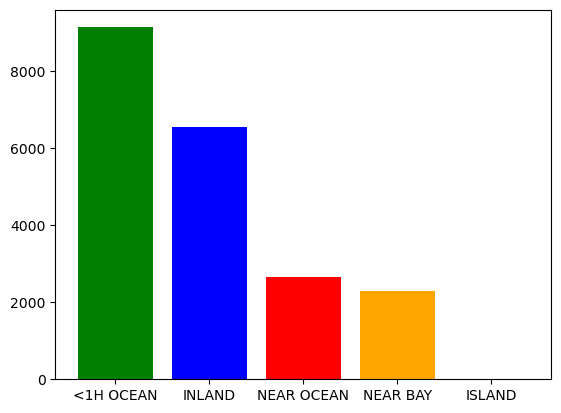

In [77]:
plt.bar(df['ocean_proximity'].value_counts().index,df['ocean_proximity'].value_counts(),color={'red','blue','green','orange'})

<Axes: xlabel='total_rooms', ylabel='median_house_value'>

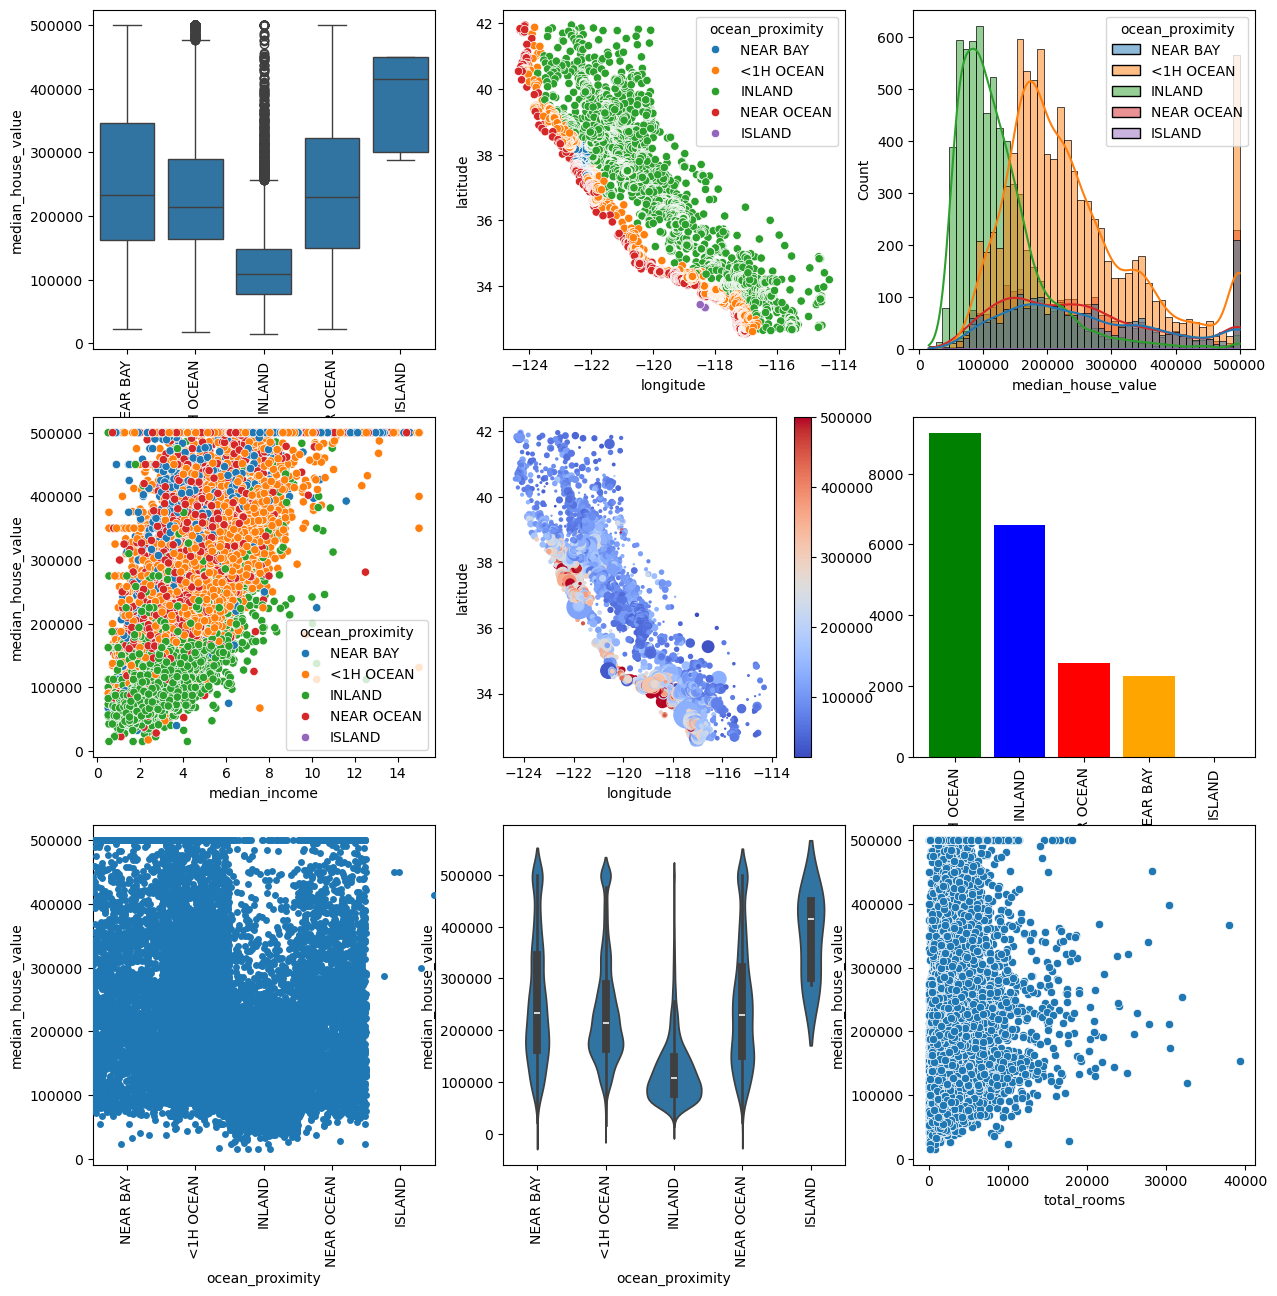

In [78]:
plt.figure(figsize=(15,15))
plt.subplot(3,3,1)
sns.boxplot(data=df,x='ocean_proximity',y='median_house_value')
plt.xticks(rotation=90)
plt.subplot(3,3,2)
sns.scatterplot(x='longitude',y='latitude',hue='ocean_proximity',data=df)
plt.subplot(3,3,3)
sns.histplot(data=df,x='median_house_value',hue='ocean_proximity',kde=True)
plt.subplot(3,3,4)
sns.scatterplot(data=df,x='median_income',y='median_house_value',hue='ocean_proximity')
plt.subplot(3,3,5)
plt.scatter(data=df,x='longitude',y='latitude',s=df['population']/100,c='median_house_value',label='popolation',cmap='coolwarm')
plt.xlabel('longitude')
plt.ylabel('latitude')
plt.colorbar()
plt.subplot(3,3,6)
plt.bar(df['ocean_proximity'].value_counts().index,df['ocean_proximity'].value_counts(),color={'red','blue','green','orange'})
plt.xticks(rotation=90)
plt.subplot(3,3,7)
sns.stripplot(data=df,x='ocean_proximity',y='median_house_value',jitter=0.5)
plt.xticks(rotation=90)
plt.subplot(3,3,8)
sns.violinplot(data=df,x='ocean_proximity',y='median_house_value')
plt.xticks(rotation=90)
plt.subplot(3,3,9)
sns.scatterplot(data=df,x='total_rooms',y='median_house_value')

*   The house value seems capped at $500,000 — meaning high-end homes were removed.

* Most of districts are within 1 hour of the ocean — a strong potential factor for higher house prices.

* Using the longitude and latitude valuse we can get the map of california using scatterplot







array([[<Axes: title={'center': 'longitude'}>,
        <Axes: title={'center': 'latitude'}>,
        <Axes: title={'center': 'housing_median_age'}>],
       [<Axes: title={'center': 'total_rooms'}>,
        <Axes: title={'center': 'total_bedrooms'}>,
        <Axes: title={'center': 'population'}>],
       [<Axes: title={'center': 'households'}>,
        <Axes: title={'center': 'median_income'}>,
        <Axes: title={'center': 'median_house_value'}>]], dtype=object)

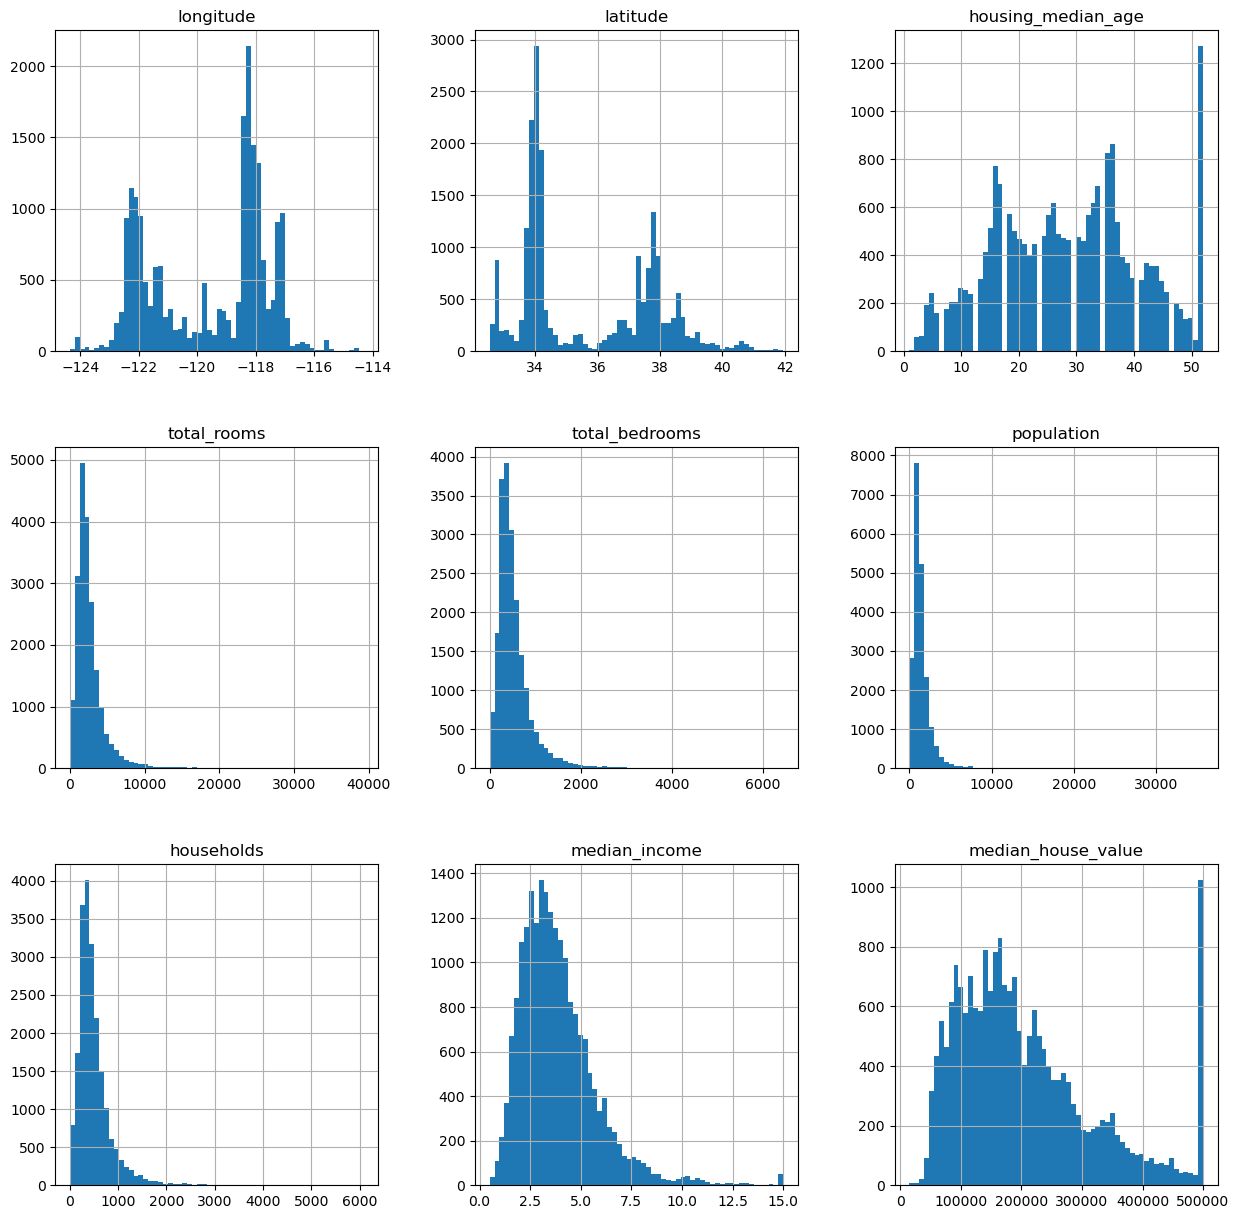

In [79]:
df.hist(bins=60,figsize=(15,15))

#Odd Patterns & Outliers
##Data distributions which slightly sticks out:

* On first impression, a few outlier (inconsistent with entire set) groups are present in our data; possibly due to the way in which the data was sampled ( 'housing_median_age' & 'median_house_value' )

* House_median_age is one possible feature with such outliers. Also having a lot of local peaks (all are quite gradual) but one really odd peak at the maximum value stands out. It has some slight discontinuity in data

* Feature Median_house_value has an odd peak at its maximum value (around 500k), which could be an outlier.



##Less Noticeable Outliers

* The range of the x axis for some of these features is quite broad (eg. population), indicating we have quite a few outliers, but unlike the first two, we can apply transformation to features and attempt to correct it.

* Population, total_bedrooms and total_rooms represent somewhat connected things, also have similar distribution which is skewed t owards smaller values




*  Some features like total_rooms, population, and households are highly skewed scaling is needed.



#FEATURE ENGINEERING

*   We want to make sure we feed the model data that is most relevant to the prediction of a target variable, perhaps as less overlapping as possible as well.

* We'll also create a feature which combines both coordinates as the we saw in the multivariate data, there is a relation that changes quite steadily on the diagonal (moving closer to the ocean and inland).




In [80]:
df['bedrooms_per_rooms']=df['total_bedrooms']/df['total_rooms']
df['rooms_per_household']=df['total_rooms']/df['households']
df['diagonal_loc']=df['latitude']+df['longitude']
df['population_per_household']=df['population']/df['households']

In [81]:
df.head(5)

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity,bedrooms_per_rooms,rooms_per_household,diagonal_loc,population_per_household
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY,0.146591,6.984127,-84.35,2.555556
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY,0.155797,6.238137,-84.36,2.109842
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY,0.129516,8.288136,-84.39,2.802260
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY,0.184458,5.817352,-84.40,2.547945
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY,0.172096,6.281853,-84.40,2.181467


#Correlation Matrix


*  We use the correlation matrix to findout the affect of every attribute on the data


<Axes: >

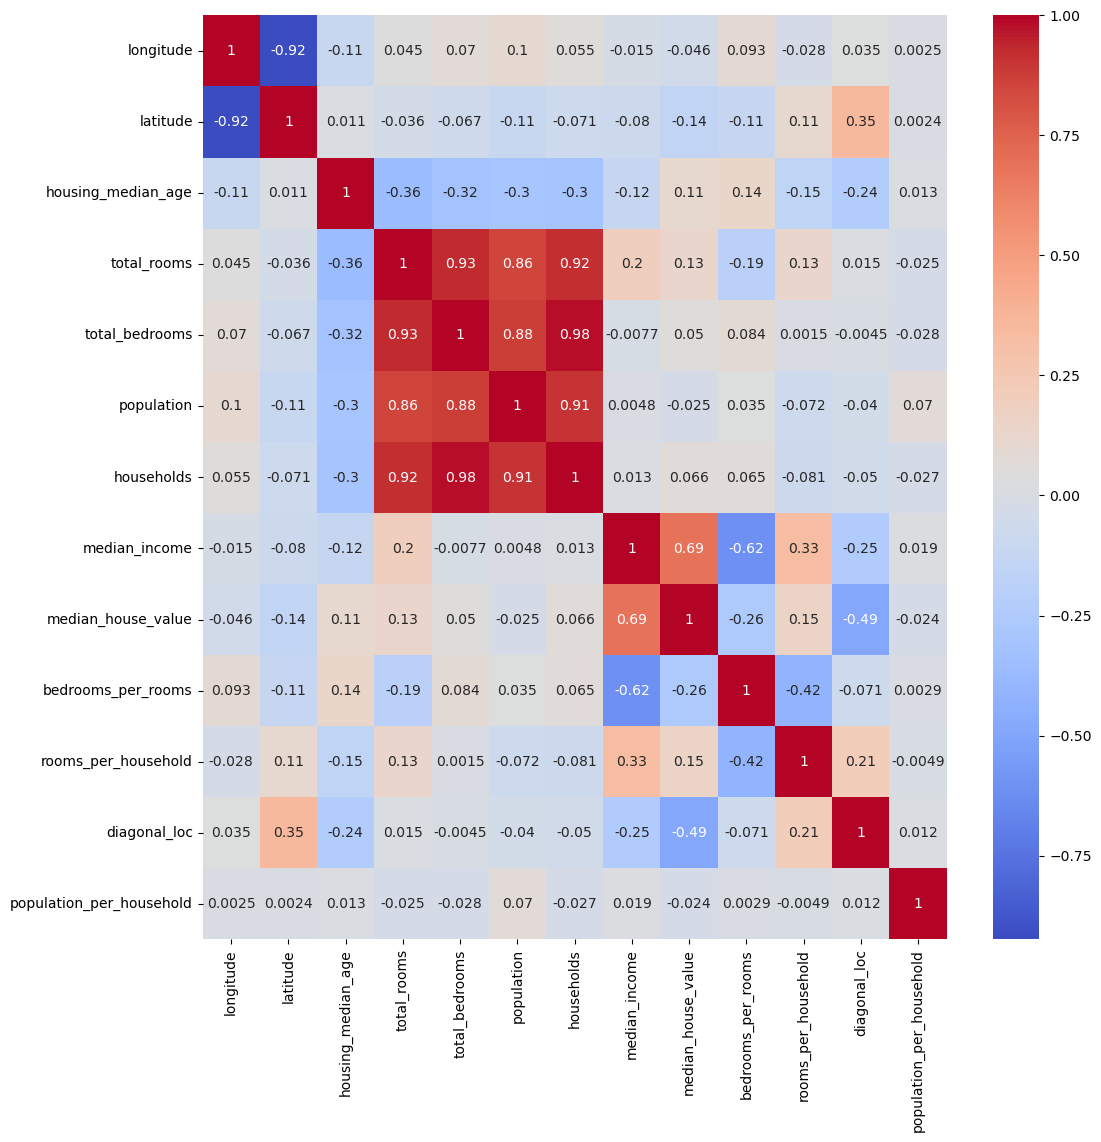

In [82]:
corr=df.drop('ocean_proximity',axis=1).corr()
plt.figure(figsize=(12,12))
sns.heatmap(corr,annot=True,cmap='coolwarm')

In [83]:
h_corr=corr['median_house_value'].sort_values(ascending=False)

<Axes: >

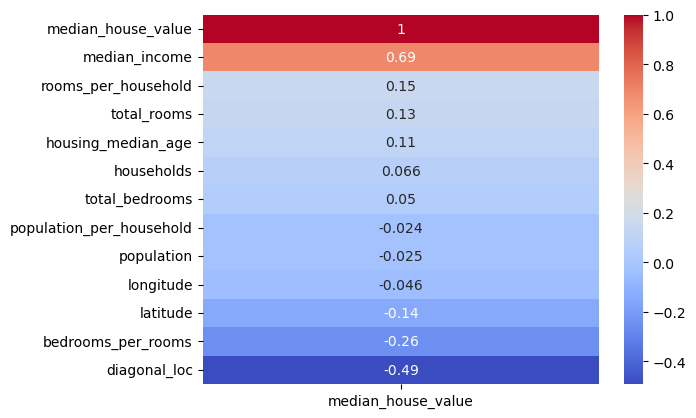

In [84]:
sns.heatmap(h_corr.to_frame(),annot=True,cmap='coolwarm')

#Data Cleaning

* Since the null data is only found in total bedrooms and it make only a small amount of data so we drop the rows with null values



In [85]:
df.isnull().sum()

longitude                     0
latitude                      0
housing_median_age            0
total_rooms                   0
total_bedrooms              207
population                    0
households                    0
median_income                 0
median_house_value            0
ocean_proximity               0
bedrooms_per_rooms          207
rooms_per_household           0
diagonal_loc                  0
population_per_household      0
dtype: int64

In [86]:
df_na=df.dropna()
df_na.shape

(20433, 14)

#Detecting and Removing Outliers




In [87]:
numeric_cols = df.select_dtypes(include=[np.number]).columns
Q1 = df_na[numeric_cols].quantile(0.25)
Q3 = df_na[numeric_cols].quantile(0.75)
IQR = Q3 - Q1

df_no_outliers = df_na[~((df_na[numeric_cols] < (Q1 - 1.5 * IQR)) |
                      (df_na[numeric_cols] > (Q3 + 1.5 * IQR))).any(axis=1)]

In [88]:
df_no_outliers.shape

(15424, 14)

#ONE_HOT_ENCODING On Categorical Data


* We use the function get_dummies() to change the Catergorical data into numerical data to prepare them for the machine learning module



In [89]:
df_no_outliers['ocean_proximity'].value_counts()

ocean_proximity
<1H OCEAN     6861
INLAND        4720
NEAR OCEAN    2026
NEAR BAY      1812
ISLAND           5
Name: count, dtype: int64

In [90]:
distance=pd.get_dummies(df_no_outliers['ocean_proximity'],dtype=int)

In [91]:
df_no_outliers=pd.concat([df_no_outliers.drop('ocean_proximity',axis=1),distance],axis=1)

In [92]:
df_no_outliers.head(5)

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,bedrooms_per_rooms,rooms_per_household,diagonal_loc,population_per_household,<1H OCEAN,INLAND,ISLAND,NEAR BAY,NEAR OCEAN
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,0.129516,8.288136,-84.39,2.802260,0,0,0,1,0
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,0.184458,5.817352,-84.40,2.547945,0,0,0,1,0
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,0.172096,6.281853,-84.40,2.181467,0,0,0,1,0
5,-122.25,37.85,52.0,919.0,213.0,413.0,193.0,4.0368,269700.0,0.231774,4.761658,-84.40,2.139896,0,0,0,1,0
6,-122.25,37.84,52.0,2535.0,489.0,1094.0,514.0,3.6591,299200.0,0.192899,4.931907,-84.41,2.128405,0,0,0,1,0


#Data Splitting


*  We will Split the data into training and testing data

*  We will use standard scalar to organize the data



In [93]:
x=df_no_outliers.drop('median_house_value',axis=1)
y=df_no_outliers['median_house_value']

In [94]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42)

In [95]:
scale=StandardScaler()
columns_train=x_train[['total_rooms','total_bedrooms','population','bedrooms_per_rooms','rooms_per_household','households']]
columns_test=x_test[['total_rooms','total_bedrooms','population','bedrooms_per_rooms','rooms_per_household','households']]
columns_train=scale.fit_transform(columns_train)
columns_test=scale.transform(columns_test)
x_train[['total_rooms','total_bedrooms','population','bedrooms_per_rooms','rooms_per_household','households']]=columns_train
x_test[['total_rooms','total_bedrooms','population','bedrooms_per_rooms','rooms_per_household','households']]=columns_test

In [96]:
x_train.head(5)

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,bedrooms_per_rooms,rooms_per_household,diagonal_loc,population_per_household,<1H OCEAN,INLAND,ISLAND,NEAR BAY,NEAR OCEAN
10497,-117.67,33.51,17.0,-0.088924,0.126798,1.158570,0.024274,4.0388,0.414468,-0.337828,-84.16,4.371824,1,0,0,0,0
11939,-117.42,33.93,32.0,0.630309,0.651161,0.504865,0.798075,3.1795,-0.076324,-0.325726,-83.49,2.557627,0,1,0,0,0
2520,-122.23,39.75,16.0,-0.168942,-0.256215,-0.308861,-0.227088,1.9375,-0.327865,0.083681,-82.48,2.698953,0,1,0,0,0
14183,-117.07,32.71,39.0,0.508421,0.911063,1.788441,0.941006,2.2454,0.635528,-0.761731,-84.36,3.655897,0,0,0,0,1
16216,-121.32,37.95,36.0,-1.358979,-1.200069,-1.488593,-1.395182,1.7885,1.015063,-0.066634,-83.37,2.331034,0,1,0,0,0


In [97]:
x_test.head(5)

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,bedrooms_per_rooms,rooms_per_household,diagonal_loc,population_per_household,<1H OCEAN,INLAND,ISLAND,NEAR BAY,NEAR OCEAN
9484,-123.15,39.31,19.0,-1.099385,-1.127114,-1.342190,-1.360681,2.8833,-0.226456,1.514545,-83.84,2.789474,0,1,0,0,0
13734,-117.19,34.05,33.0,0.743823,0.208872,0.067360,0.295351,3.8816,-1.024271,0.932721,-83.14,2.565574,0,1,0,0,0
288,-122.17,37.78,49.0,-1.223134,-1.254785,-1.267287,-1.217750,3.8750,-0.263715,-0.282325,-84.39,2.585635,0,0,0,1,0
583,-122.08,37.72,32.0,0.249757,-0.383886,-0.279921,-0.301018,5.6194,-1.420636,1.511176,-84.36,2.855586,0,0,0,1,0
7117,-118.02,33.91,35.0,-0.023793,-0.283573,0.060551,-0.143300,5.4236,-0.718097,0.246923,-84.11,3.127820,1,0,0,0,0


##A function to determine the optimal 'max_depth' number for the training model

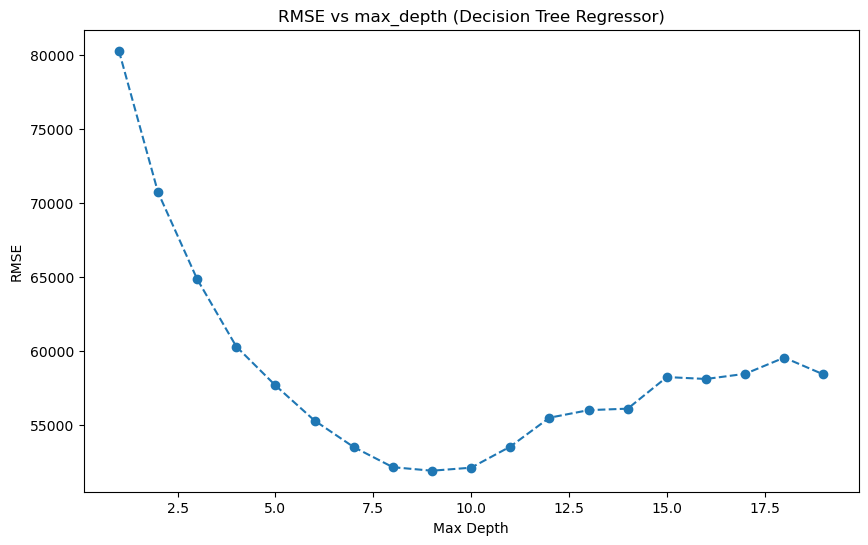

In [98]:
error_rate = []

for i in range(1, 20):
    model = DecisionTreeRegressor(max_depth=i, random_state=42)
    model.fit(x_train, y_train)
    pred_i = model.predict(x_test)

    rmse = np.sqrt(mean_squared_error(y_test, pred_i))
    error_rate.append(rmse)

plt.figure(figsize=(10,6))
plt.plot(range(1, 20), error_rate, linestyle='dashed', marker='o')
plt.title('RMSE vs max_depth (Decision Tree Regressor)')
plt.ylabel('RMSE')
plt.xlabel('Max Depth')
plt.show()


In [99]:
min_tree=error_rate.index(np.min(error_rate))
min_tree

8

In [102]:


models = {
    "Linear Regression": Pipeline([
        ("scaler", StandardScaler()),
        ("model", LinearRegression())
    ]),
    
    "Support Vector Machine": Pipeline([
        ("scaler", StandardScaler()),
        ("model", SVR())
    ]),
    
    "K-Nearest Neighbors": Pipeline([
        ("scaler", StandardScaler()),
        ("model", KNeighborsRegressor(n_neighbors=17))
    ]),
    
    "Decision Tree": DecisionTreeRegressor(max_depth=18, random_state=42),
    
    "Random Forest": RandomForestRegressor(
        max_depth=10,
        n_estimators=200,
        random_state=42
    ),
    
    "Gradient Boosting": GradientBoostingRegressor(random_state=42)
}

def evaluate_models(X_train, X_test, y_train, y_test):
    results = []
    
    for name, model in models.items():
        model.fit(X_train, y_train)
        y_pred = model.predict(X_test)
        
        r2 = r2_score(y_test, y_pred)
        mae = mean_absolute_error(y_test, y_pred)
        rmse = np.sqrt(mean_squared_error(y_test, y_pred))
        
        results.append((name, r2, mae, rmse))
    
    return results

results = evaluate_models(x_train, x_test, y_train, y_test)

print("Model Performance:\n")
for name, r2, mae, rmse in results:
    print(f"{name:25s} | R2: {r2:.4f} | MAE: {mae:.2f} | RMSE: {rmse:.2f}")


Model Performance:

Linear Regression         | R2: 0.6511 | MAE: 42049.35 | RMSE: 56443.64
Support Vector Machine    | R2: -0.0176 | MAE: 75914.60 | RMSE: 96390.44
K-Nearest Neighbors       | R2: 0.7097 | MAE: 35995.55 | RMSE: 51487.07
Decision Tree             | R2: 0.6117 | MAE: 40122.39 | RMSE: 59546.26
Random Forest             | R2: 0.7784 | MAE: 31002.85 | RMSE: 44984.03
Gradient Boosting         | R2: 0.7672 | MAE: 32407.03 | RMSE: 46099.91


Conclusion
The project successfully applied supervised machine learning techniques to predict median house values using census data. Feature engineering and categorical encoding improved model performance. Among the tested models, Random Forest achieved better predictive accuracy, indicating that housing prices exhibit non-linear relationships with the input features.